## Problem 2

## Prepare a classification model using SVM for salary data

## Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Import dataset

In [2]:
d_train=pd.read_csv("SalaryData_Train(1).csv")
d_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
d_test=pd.read_csv("SalaryData_Test(1).csv")
d_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## EDA

### Checking informations of each train and test data 

In [4]:
# train
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
# test
d_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [6]:
d_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
d_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


## duplicates

In [8]:
# train
d_train[d_train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [9]:
d_train.drop_duplicates()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [10]:
# test
d_test[d_test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [11]:
d_test.drop_duplicates()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## Correlation of both train and test dataset by showing heatmap

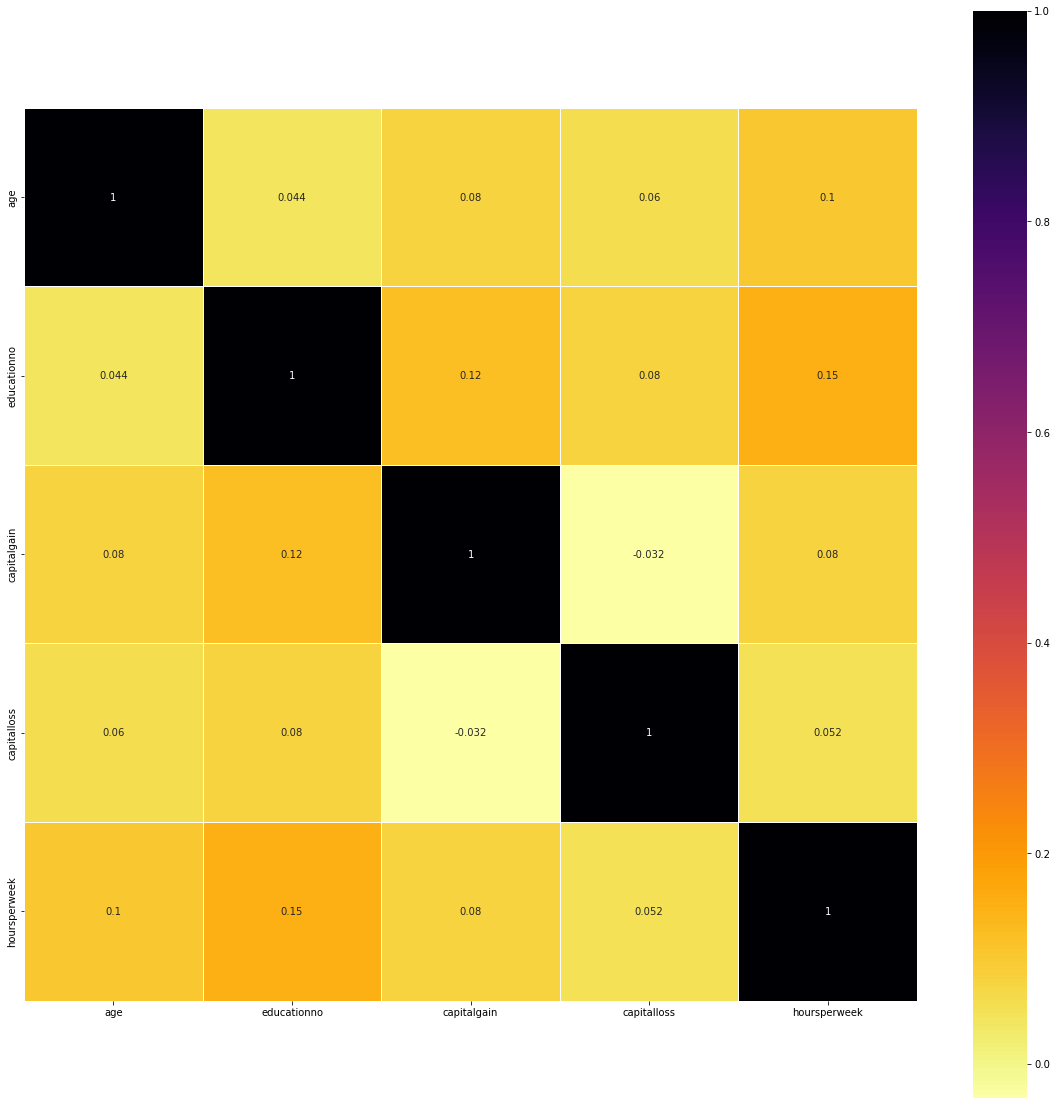

In [12]:
# train
cor_train=d_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(data=cor_train, linewidth=.5, annot=True, square=True, cmap="inferno_r")
plt.show()

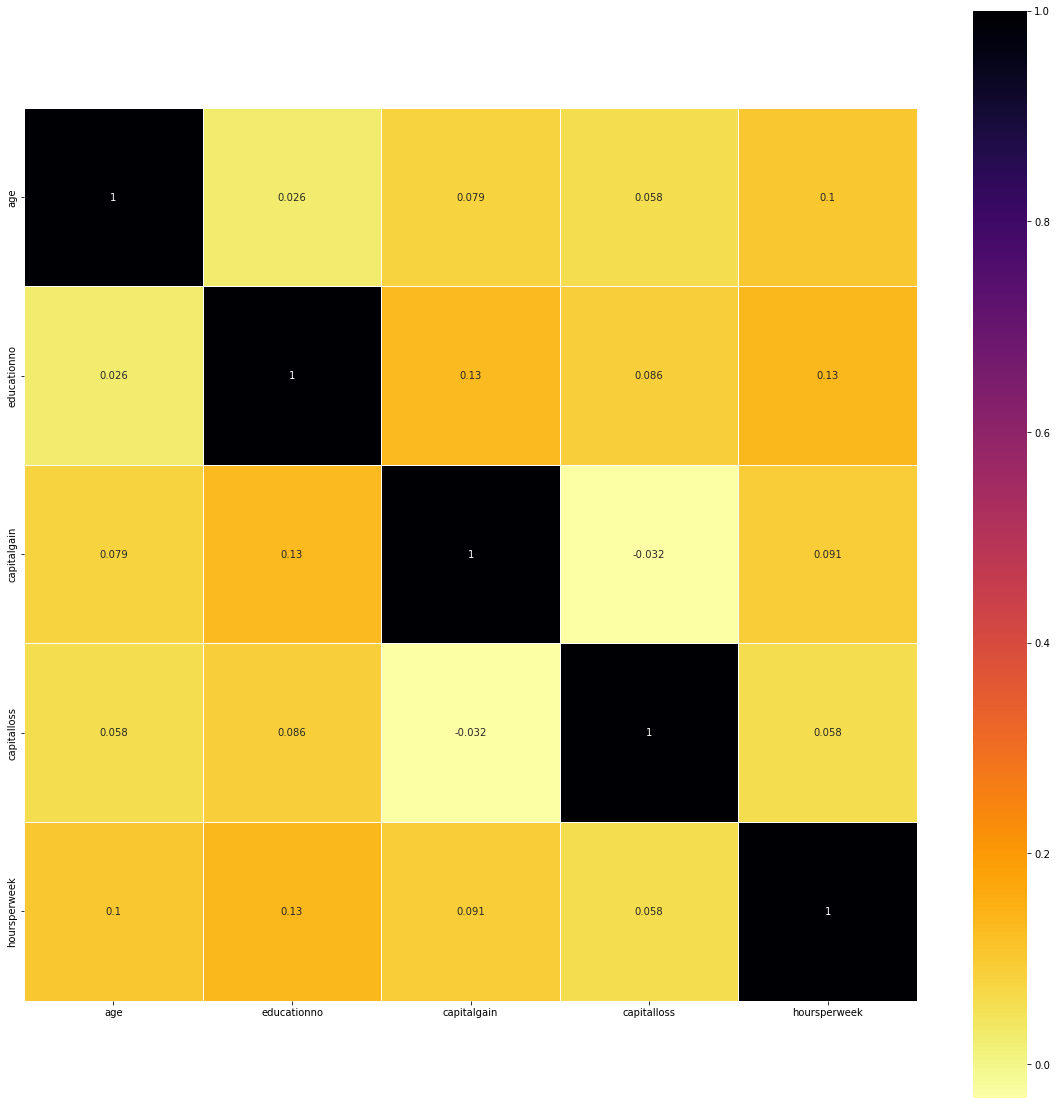

In [13]:
# test
cor_test=d_test.corr()
plt.figure(figsize=(20,20))
sns.heatmap(data=cor_test, linewidth=.5, annot=True, square=True, cmap="inferno_r")
plt.show()

## Label Encoder

In [14]:
from sklearn.preprocessing import LabelEncoder

## Label Encoding in train

In [15]:
d_train=d_train.apply(LabelEncoder().fit_transform)
d_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


## Label Encoding in test

In [16]:
d_test=d_test.apply(LabelEncoder().fit_transform)
d_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


## Spliting target variable and independent variable - Train data

In [17]:
x_train=d_train.drop(["education","relationship","native","maritalstatus","sex","race","Salary"],axis=1)
y_train=d_train["Salary"]
print(np.unique(y_train))
x_train

[0 1]


,age,workclass,educationno,occupation,capitalgain,capitalloss,hoursperweek
0,22,5,12,0,24,0,39
1,33,4,12,3,0,0,12
2,21,2,8,5,0,0,39
3,36,2,6,5,0,0,39
4,11,2,12,9,0,0,39
...,...,...,...,...,...,...,...
30156,10,2,11,12,0,0,37
30157,23,2,8,6,0,0,39
30158,41,2,8,0,0,0,39
30159,5,2,8,0,0,0,19


## Spliting target variable and independent variable-test data

In [18]:
x_test=d_test.drop(["education","relationship","native","maritalstatus","sex","race","Salary"], axis=1)
y_test=d_test["Salary"]
print(np.unique(y_test))
x_test

[0 1]


,age,workclass,educationno,occupation,capitalgain,capitalloss,hoursperweek
0,8,2,6,6,0,0,39
1,21,2,8,4,0,0,49
2,11,1,11,10,0,0,39
3,27,2,9,6,87,0,39
4,17,2,5,7,0,0,29
...,...,...,...,...,...,...,...
15055,16,2,12,9,0,0,39
15056,22,2,12,9,0,0,35
15057,21,2,12,9,0,0,49
15058,27,2,12,0,73,0,39


## SVM

In [19]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.decomposition import PCA

## PCA 

In [20]:
pca=PCA()
pca_values=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

In [21]:
x_test

array([[ -7.96516669, -12.2370627 ,   3.9782631 , ...,  -0.20838814,
          2.92174516,  -0.08517545],
       [ -5.85873441,   3.14922902,   8.47917458, ...,  -2.07769123,
          1.08042106,  -0.2025596 ],
       [ -7.55153417,  -9.42630698,   3.05660499, ...,   4.19374931,
         -1.71253887,  -1.17258227],
       ...,
       [ -5.77243173,   3.19866075,   8.63805499, ...,   3.23218947,
         -2.49094742,  -0.26506621],
       [ 66.48244563,  -3.29894165,  -4.73029714, ...,  -5.96882189,
         -2.37675458,  -0.25432386],
       [ -5.38832333,   3.87973662,  18.92271477, ...,  -2.84189694,
         -2.70171498,   0.7410026 ]])

## 1). Linear support vector machine,gamma=0.22

### Checking the accuracy score

In [22]:
svc=SVC(gamma=0.22)
svc.fit(x_train,y_train)
score=svc.score(x_test,y_test)*100
print("Accuracy :",score)

Accuracy : 75.4316069057105


## 2.) Radial support vector machine, gamma = 0.22

### Checking the accuracy score

In [ ]:
svc2=SVC(kernel="rbf",C=1,gamma=0.22)
svc2.fit(x_train,y_train)
score2=svc2.score(x_test,y_test)*100
print("Accuracy :",score2)

## Sigmoid support vector machine,gamma=0.22

### Checking the accuracy score

In [ ]:
svc3=SVC(kernel="sigmoid",C=1,gamma=0.22)
svc3.fit(x_train,y_train)
score3=svc3.score(x_test,y_test)*100
print("Accuracy :",score3)

# Checking the SVM with another gamma value = 0.33

## Linear svm with gamma = 0.33

### Checking the accuracy

In [ ]:
svc_1=SVC(gamma=0.33)
svc_1.fit(x_train,y_train)
score_1=svc_1.score(x_test,y_test)*100
print("Accuracy :",score_1)

## 2). Polynomial svm with gamma=0.33

### Checking the accuracy

In [ ]:
svc_2=SVC(kernel="poly", C=1, gamma=0.33)
svc_2.fit(x_train,y_train)
score_2=svc_3.score(x_test,y_test)*100
print("Accuracy :",score_2)

## 3). Sigmoid svm with gamma 0.33

### checking the accuracy

In [ ]:
svc_3=SVC(kernel="sigmoid", C=1, gamma=0.33)
svc_3.fit(x_train,y_train)
score_3=svc_3.score(x_test,y_test)*100
print("Accuracy :",score_3)

## Tabling all the models with their accuracy

In [ ]:
m= {"Model":["Lin_SVM_0.22","Radial_SVM_0.22","Sigmoid_SVM_0.22","Lin_SVM_0.33","Poly_SVM_0.33","Sigmoid_SVM_0.33"],
    "ACCURACY":[score,score2,score3,score_1,score_2,score_3]}
Ma=pd.DataFrame(m)
Ma

## Predicting the model in test data with kernel  = Polynomial and gamma = 0.33 (which having high accuracy score)

In [ ]:
psvm=SVC(kernel="poly",C=1,gamma=0.33)
psvm.fit(x_train,y_train)
y_test_pred=psvm.predict(x_test)

## Accuracy score of test data

In [ ]:
acc=accuracy_score(y_test,y_test_pred)*100
acc

## Confusion matrix of test data using heatmap

In [ ]:
cfm=confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,15))
sns.heatmap(data=cfm, linewidth=.5, annot=True, square=True, cmap="inferno_r")
plt.show()

## Classification report of test data

In [ ]:
print(classification_report(y_test,y_test_pred))

## Visualization using histogram

In [ ]:
plt.rcParams["figure.figsize"]=(9,9)
_, ax=plt.subplots()
ax.hist(y_test,color ="lawngreen", alpha=0.5, label="ACTUAL",bins=3)
ax.hist(y_test_pred,color= "deeppink", alpha= 0.5, label="PREDICTION",bins=3)
ax.yaxis.set_tricks(np.arange(0,11))
ax.legend(loc="best")
plt.show()